# EXERCISE 2.2: REGULARIZED LOGISTIC REGRESSION

*This is the programming assignment for **week 3** of the Stanford University **Machine Learning** course on coursera.org*

## Before you start

Read the original assignment document (ex2.pdf), this will guide you through the assignment.
Note that the PDF is the orginal document for the course which assumes you will be implementing the assignment in Matlab/Octave. 

Do not change any code in this nodebook file; your job is to implement the following:
- <u>Task 1</u>: costFunctionReg

Variable conventions:
- ``m`` : number of training examples (rows in the dataset) - scalar value
- ``n`` : number of features in the data (columns in the dataset, excluding the column with result values) - scalar value
- ``X_data`` : m x n matrix representing all input data - 2D array
- ``X`` : m x (n+1) design matrix, basically X_data preprended with a column of ones - 2D array
- ``y`` : m element result vector - 1D array
- ``theta`` : n+1 element fitting parameter vector - 1D array

In [1]:
# 3rd party libraries
import numpy as np
import scipy.optimize as opt  

# pre-defined functions
from plotDecisionBoundary import plotDecisionBoundary
from mapFeature import mapFeature

# user defined functions you implemented in the first section of the exercise
from plotData import plotData
from sigmoid import sigmoid
from predict import predict

# user defined functions; you will be implementing these 
from costFunctionReg import costFunctionReg

## Prepare: plot the data

<module 'matplotlib.pyplot' from 'C:\\dev\\sys\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

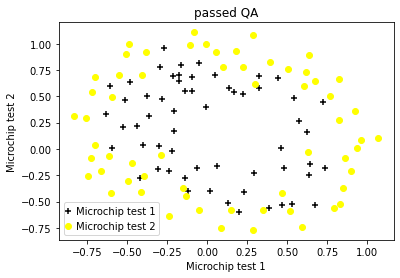

In [2]:
# read the data from the CSV file
data = np.genfromtxt('ex2data2.txt', delimiter=',')

# separate data into
# - features matrix X: all columns but the last  of the dataset
# - result vector y: last column of the dataset
X = data[:, :-1]
y = data[:, -1]

# plot the data
plotData(X, y, 'passed QA', 'Microchip test 1', 'Microchip test 2')

## Part 1: Regularized Logistic Regression

In this part, you are given a dataset with data points that are not linearly separable. 
However, you would still like to use logistic regression to classify the data points.

To do so, you introduce more features to use -- 
in particular, you add polynomial features to our data matrix (similar to polynomial regression).

In this part of the exercise you will implement the cost and gradient calculation for *Regularized* logistic regression. 

<u>Task 1</u>: implement costFunctionReg.py

In [3]:
# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled

X = mapFeature(X[:,0], X[:,1])

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
llambda = 1

In [4]:
# Compute cost and gradient for regularized logistic regression
# (task 1: implement costfunctionReg.py)
cost, grad = costFunctionReg(initial_theta, X, y, llambda)

In [5]:
# display cost for initial theta
cost

0.6931471805599454

*(expected cost (approx): 0.693)*

In [6]:
# display gradient - first five values only - for regularized logistic regression for initial theta
grad[0:5]

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02])

*(expected gradients (approx) - first five values only: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115)*

## Part 2: Regularization and Accuracies (optional exercise)

In this part, you will get to try different values of lambda and see how regularization affects the decision coundart

Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? How does the training set accuracy vary?

*No implementation tasks*

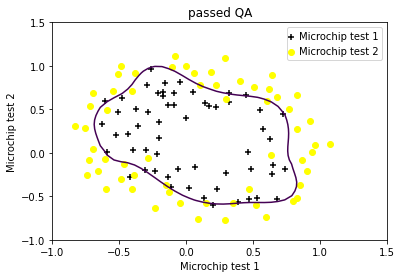

In [14]:
# Set regularization parameter lambda to 1 (you should vary this; try 0, 1, 10, 100)
llambda = 0

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Run the minimization method to obtain the optimal theta
# optimal_theta = opt.fmin_tnc(func=costFunctionReg, fprime=gradientFunctionReg, x0=initial_theta, args=(X, y, llambda))[0]
myargs = (X, y, llambda)
myoptions = {'disp': False, 'maxiter':400} # set 'disp': True to display detail results of the minimization method
optimal_theta = opt.minimize(costFunctionReg, x0=initial_theta, args=myargs, options=myoptions, method="BFGS", jac=True)["x"]

# plot data with deision boundary
plotDecisionBoundary(optimal_theta, X, y, 'passed QA', 'Microchip test 1', 'Microchip test 2')

In [8]:
# Compute accuracy on our training set
p = predict(optimal_theta, X)
accuracy = np.mean(np.double(p == y)) * 100
accuracy

83.05084745762711

*(Expected accuracy (with lambda = 1): 83.1 (approx))*